# Multivariable Linear regression
: 복수의 정보가 존재할때 

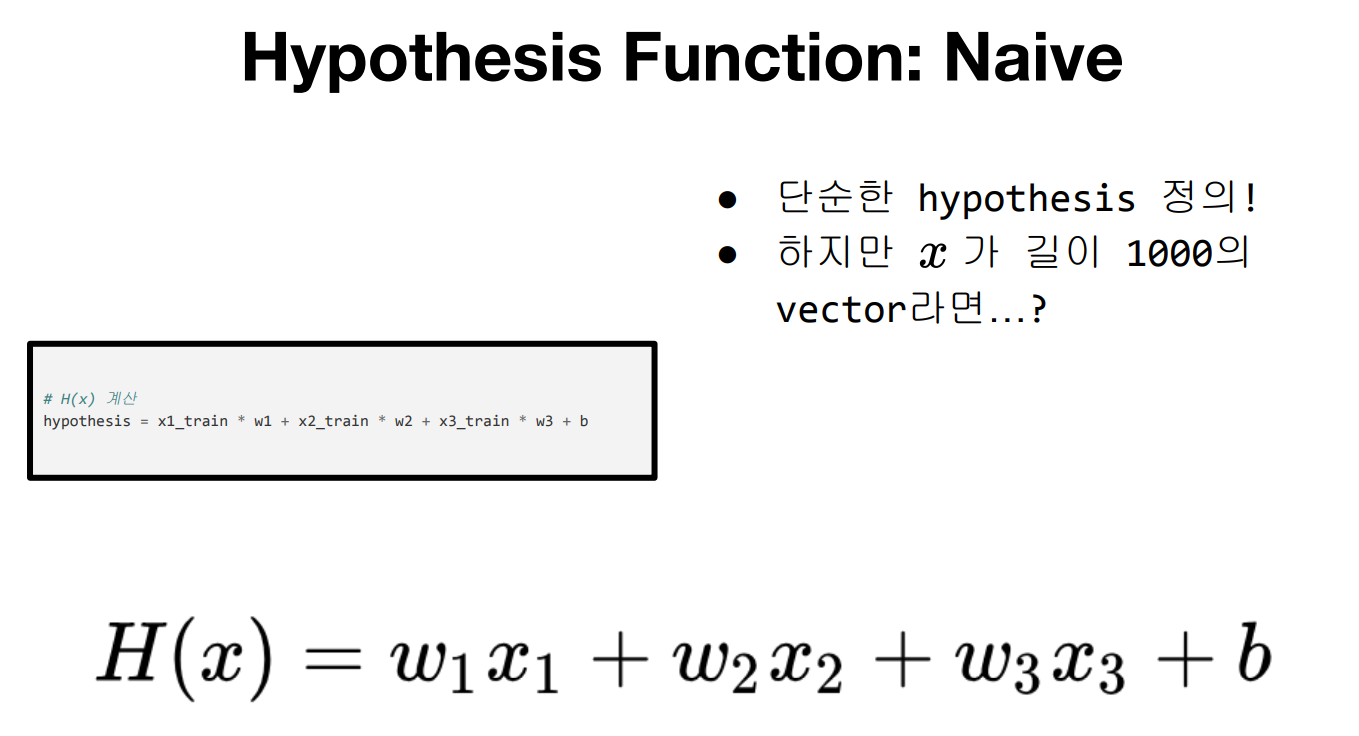

# matmul() : matrix multification 빠르고 간결
# MSE는 동일
# optimizer도 동일

In [3]:
# 데이터 정의
x_train = torch.FloatTensor([[73, 80, 75],
 [93, 88, 93],
 [89, 91, 90],
 [96, 98, 100],
 [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# H(x) 계산
 hypothesis = x_train.matmul(W) + b # or .mm or @

IndentationError: unexpected indent (994221223.py, line 10)

## 그런데, x와 b를 일일이 쓰면 모델이 너무 커짐
# 그래서 nm.Module 제공

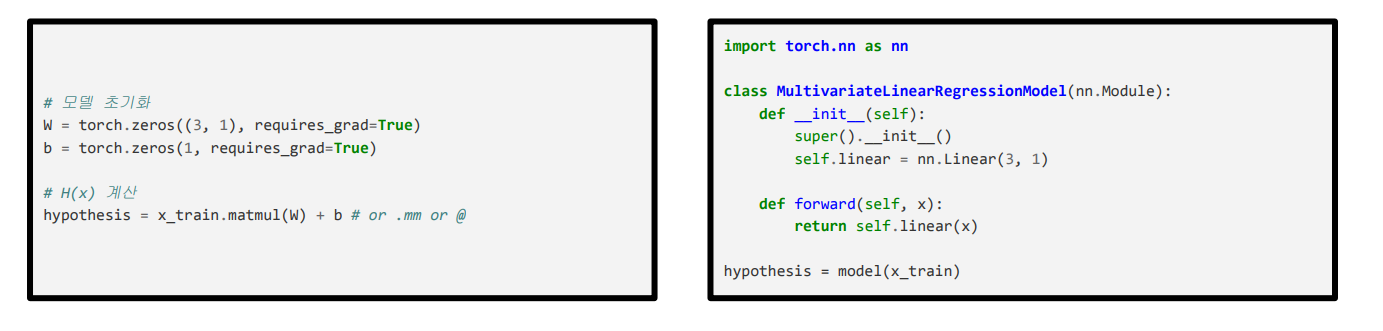

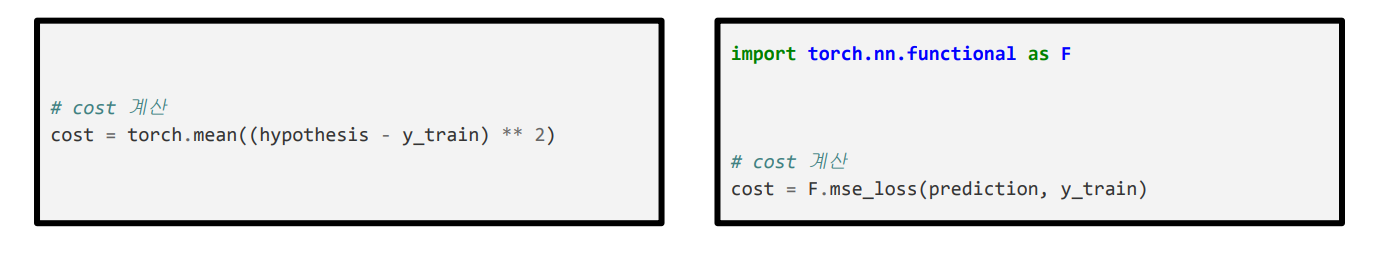

1. nm.Module 상속한 class를 만듦
2. 입력차원 출력차원 알려줌 - nn.Linear(3, 1)
3. forward() 함수에서 hypothesis 계산 어떻게 하는지 알려줌
4. costfunction pytorch가 제공 (디버깅할때 좋음!!)

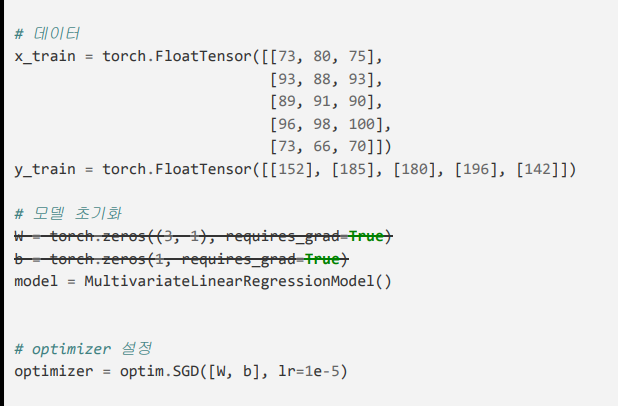
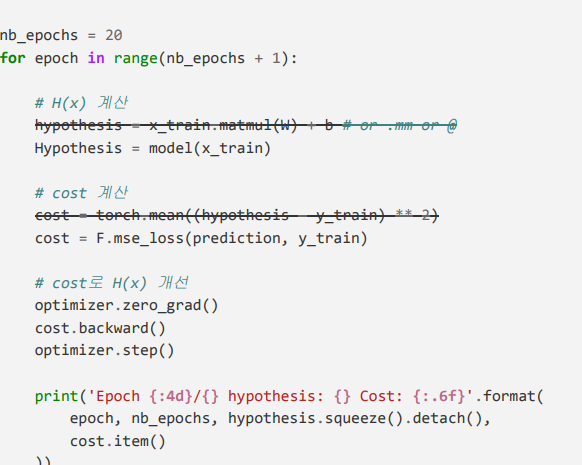

https://velog.io/@ray_park/PyTorch-%EC%9D%B5%ED%9E%88%EA%B8%B0-Multivariable-Linear-Regression

# 메모리에 다 담을 수 없는 엄청난 양의 데이터에 대해서는? (하드웨어 문제.. cost 연산 너무 느림)<br>
# "Minibatch Gradient Descent" (전체 데이터를 균등하게 나눠서 일부분만) & dataset module & dataloader module

# cost계산시 minibatch에 대해서만
# 그러나 
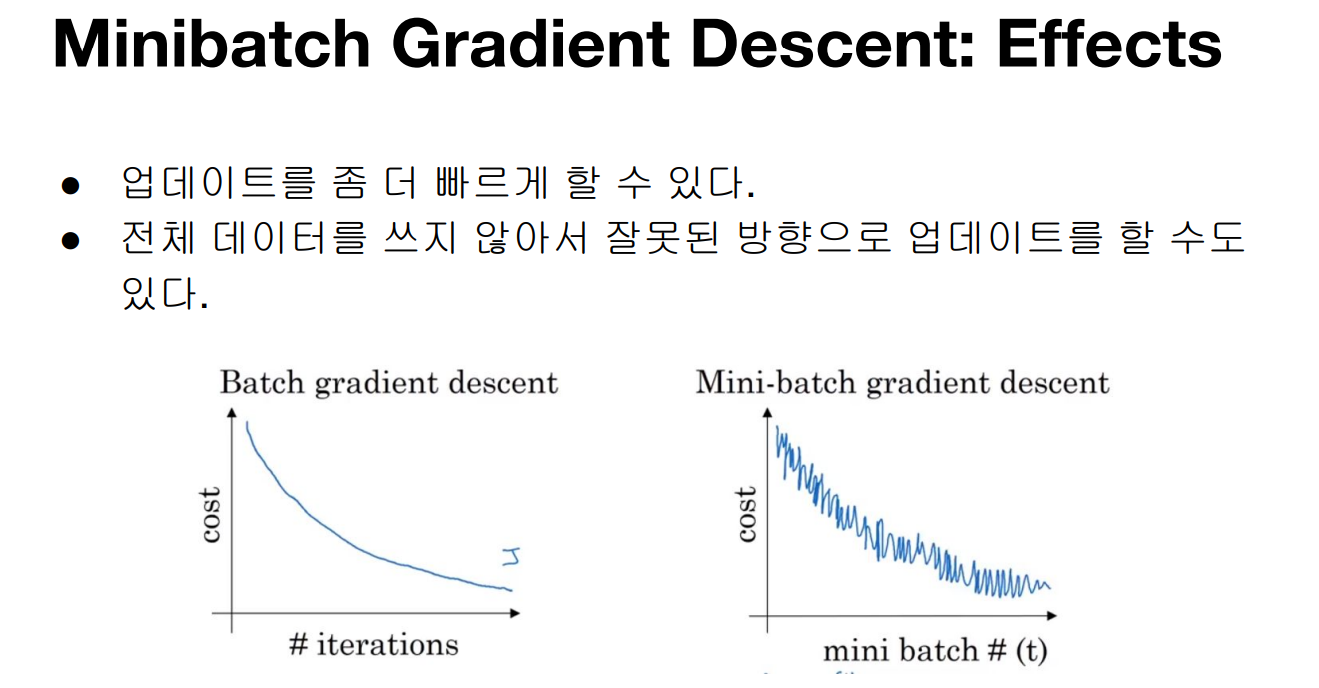

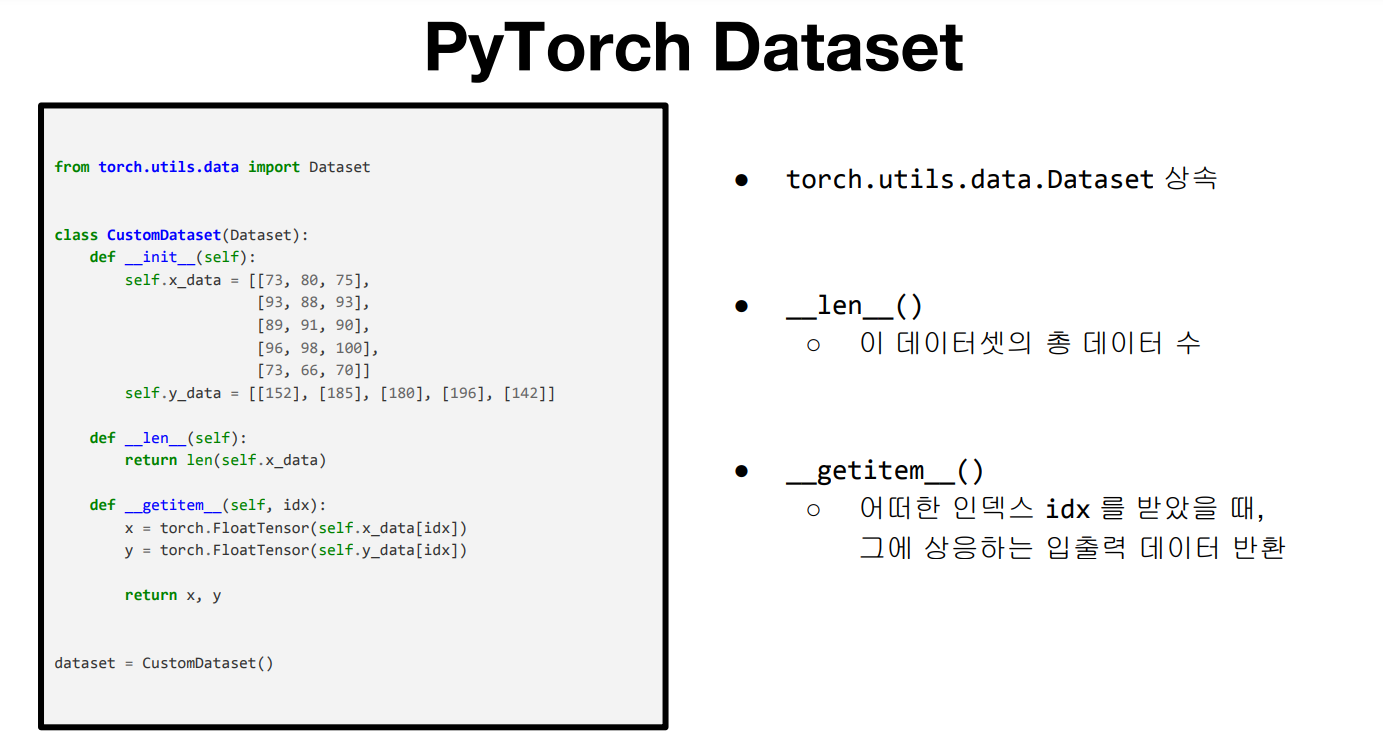
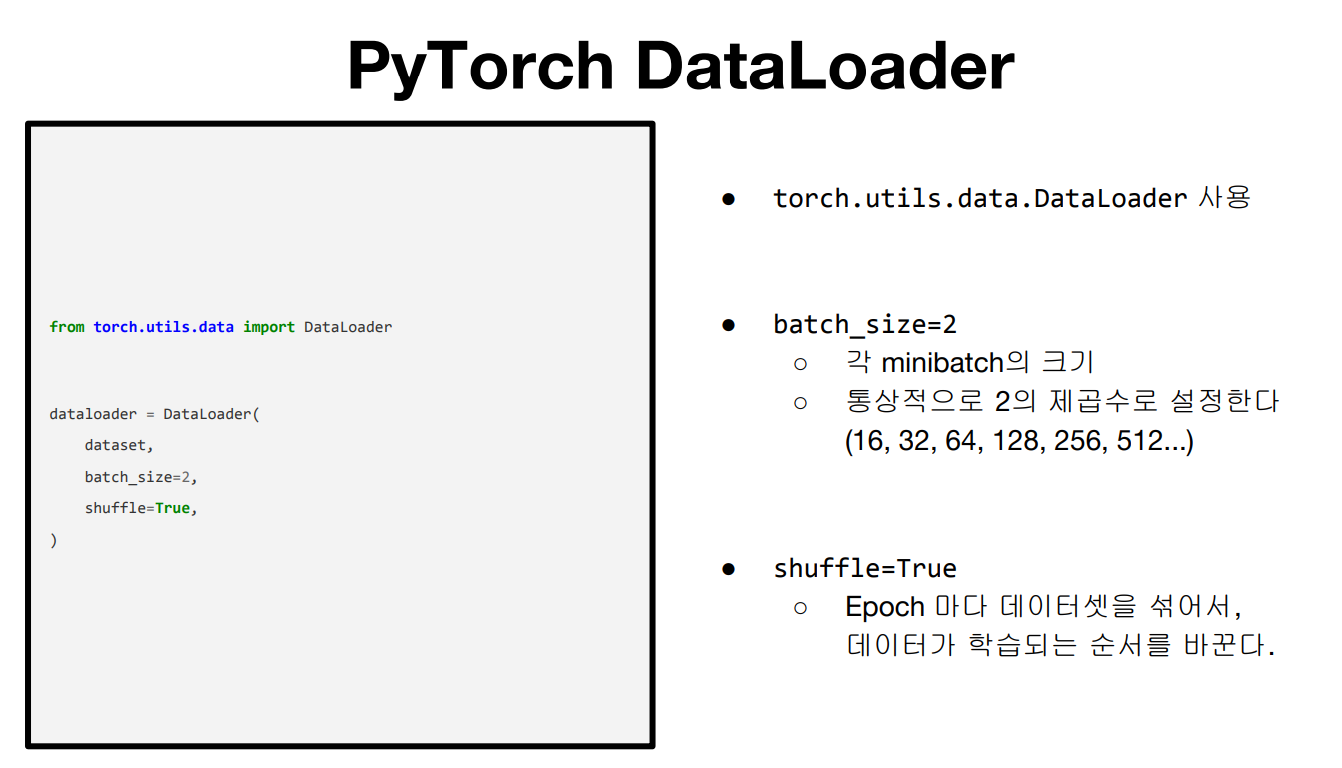
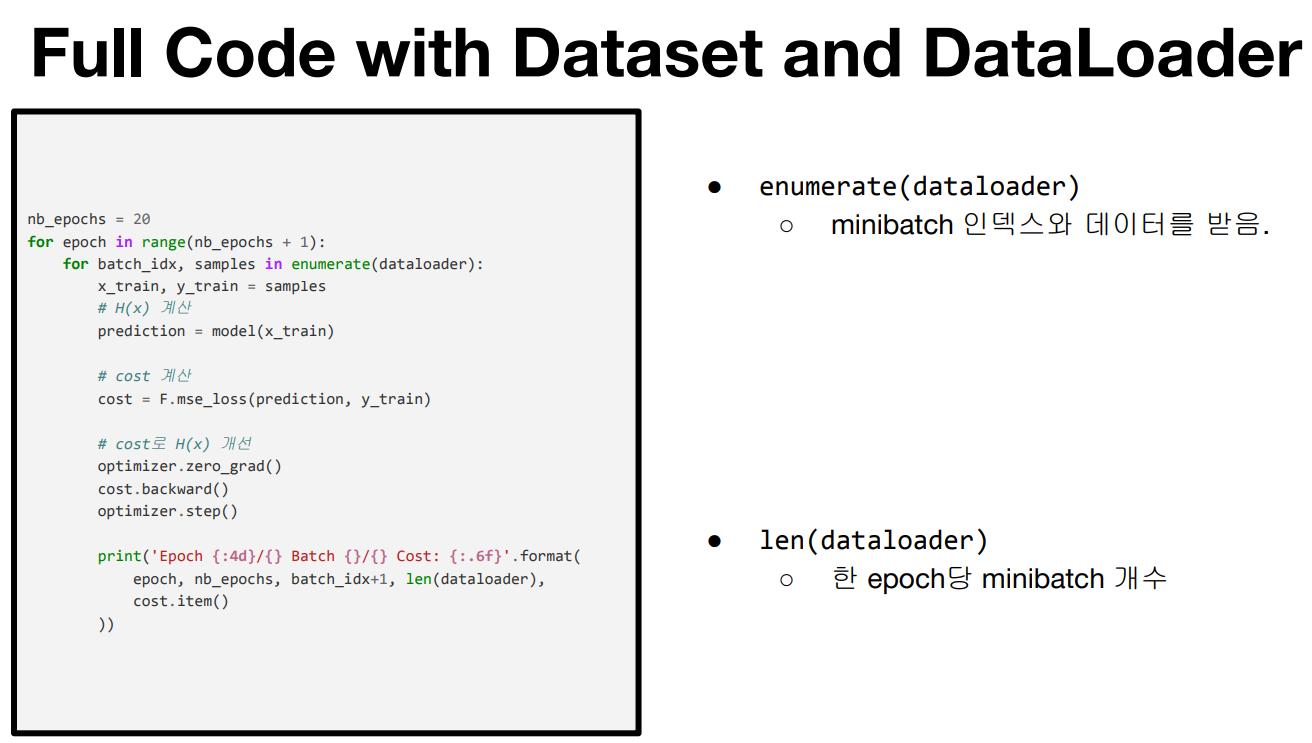

### gradient 계산 방법은 바뀌지 않았음. 대신 epoch의 for문 안에 minibatch를 위한 for문이 하나 더 추가되었음
### enumerate(dataloader) 임
### 이는 minibatch 인덱스와 데이터를 가져옴
### 이 데이터를 x와 y로 나누어서 gradient discent 시행

In [ ]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
 for batch_idx, samples in enumerate(dataloader):
 x_train, y_train = samples
 # H(x) 계산
 prediction = model(x_train)
 # cost 계산
 cost = F.mse_loss(prediction, y_train)
 # cost로 H(x) 개선
 optimizer.zero_grad()
 cost.backward()
 optimizer.step()
 print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
 epoch, nb_epochs, batch_idx+1, len(dataloader),
 cost.item()
 ))